In [1]:
import sys, os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table, join, hstack, vstack
import pywt
import h5py
sys.path.insert(1, '/home/luiz/IC/Codes/GMCA/gmca4im-master/scripts/')
import gmca4im_lib2 as g4i
from scipy import signal
from sklearn.decomposition import FastICA, PCA

In [3]:
# Visualização do formato das variaveis usadas
######################################################################################################
print(file)
print('mapas', maps.shape)
print()
print('coef1', coef1.shape)
print('coef2', coef2.shape)
print(coef2[13].shape, coef1[13].shape)
print('coeficientes1[13]', coef1_formato.shape)
print('soma', soma.shape)
######################################################################################################
#outras informações
print()
print()
h = fits.open(file)
print(h.info())
print()
print()
print(h[0].header)
######################################################################################################

/home/luiz/IC/Datas_Maps/Cube_5PSM_L100_RS.fits
mapas (30, 786432)

coef1 (30, 2359296)
coef2 (30, 786432)
(786432,) (2359296,)
coeficientes1[13] (3, 786432)
soma (786432,)


Filename: /home/luiz/IC/Datas_Maps/Cube_5PSM_L100_RS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (786432, 30)   float64   
None


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =               786432                                                  NAXIS2  =                   30                                                  EXTEND  =                    T                                                  END                                                                                                                                                   


Wavelet transforming the data . . .
. . completed in 9.15 minutes



/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

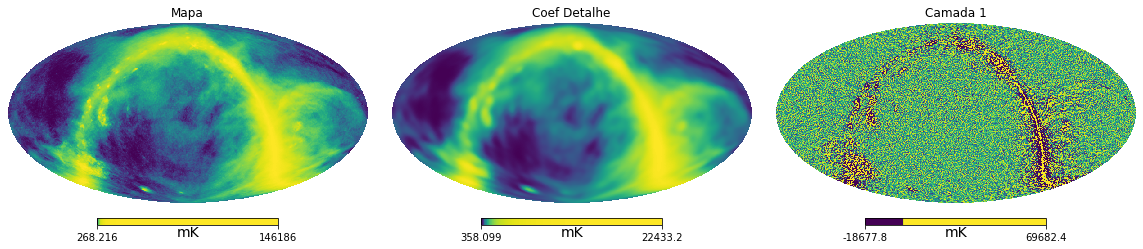

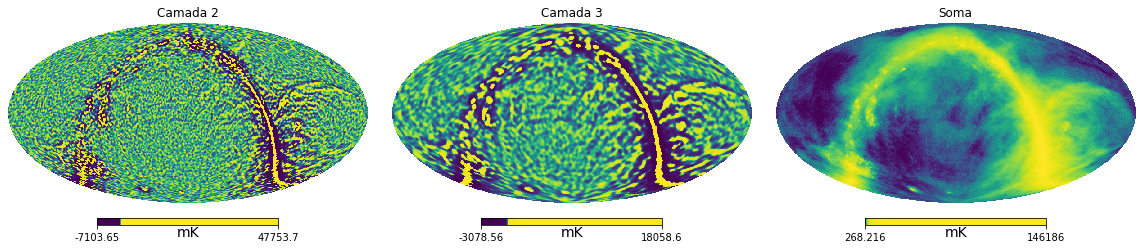

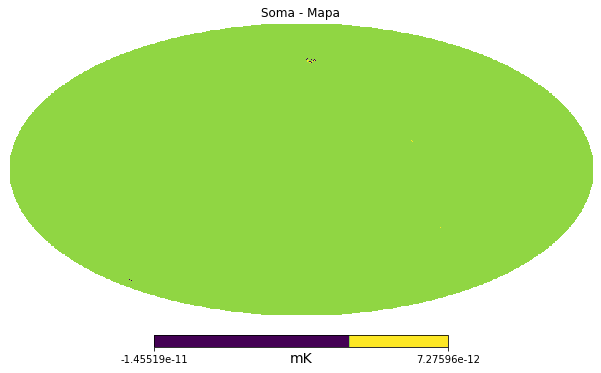

In [2]:
################## Mapa Cube, starlet wavelet
######################################################################################################
NSIDE = 2**8
######################################################################################################
### Leitura do arquivo
file = '/home/luiz/IC/Datas_Maps/Cube_5PSM_L100_RS.fits'
with fits.open(file) as hdul: 
    maps=hdul[0].data
######################################################################################################

######################################################################################################
### Manipulação das camadas wavelet
coef1, coef2 = g4i.wavelet_transform(maps) #Transformada wavelet dos mapas
coef1_formato = coef1[13].reshape(786432,3).T #Reorganização do formato da matriz com coeficientes de detalhe
coefs = np.vstack((coef1_formato,coef2[13])) #Junta as 2 matrizes com coeficientes em uma só
soma = coefs[0]+coefs[1]+coefs[2]+coefs[3]
######################################################################################################

######################################################################################################
### Plot dos mapas
mapas=[maps[13], coefs[3], coefs[0], coefs[1], coefs[2], soma ] #vetor com os mapas
titulos=["Mapa", "Coef Detalhe", "Camada 1", "Camada 2", "Camada 3", "Soma"] #vetor com os nomes
plt.figure(figsize = (16,4))
for i in range(3):
        hp.mollview(mapas[i],sub = (1,3,i+1), norm='hist', title = titulos[i], nest=False, unit='mK' )
plt.figure(figsize = (16,4))
for i in range(3):
        hp.mollview(mapas[i+3],sub = (1,3,i+1), norm='hist', title = titulos[i+3], nest=False, unit='mK')
hp.mollview(soma-maps[13], norm='hist', title='Soma - Mapa', unit ='mK' )
######################################################################################################

In [4]:
# Salvando o arquivo em formato .fits
######################################################################################################
file_name = "Mapa Teste" #Nome do arquivo
path      = "/home/luiz/IC/Datas_Maps" 
path_map = os.path.join(path,file_name) #caminho do arquivo
if os.path.isfile(path_map): os.remove(path_map) #caso voce tente rodar duas vezes este box, este comando abaixo serve para, caso o arquivo exista, excluí-lo
if os.path.isdir(path):
    hp.write_map(path_map, soma)# COLOCAR COMO PARAMETRO O MAPA A SER SALVO
######################################################################################################

/home/luiz/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


In [5]:
# Outras wavelets







